![PIC](https://imgur.com/LsFjs9S)

## Input mnist data

## 1. Call the function

In [0]:
#%env KERAS_BACKEND = tensorflow  ##確保資料的backend為tensorflow

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, IntSlider, Button ##互動

#### keras!!!

In [3]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam

#read data from 'mnist'
from keras.datasets import mnist

from keras.utils import np_utils  ## for output (one-hot encoding)

Using TensorFlow backend.


## 2. Read data and sort

In [0]:
(x_train , y_train),(x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape,x_test.shape,
      y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [0]:
xtrain = x_train.reshape(len(x_train), 28*28)
xtest = x_test.reshape(len(x_test), 28*28)

#### normalize

In [7]:
x_train1 = (xtrain - xtrain.min()) / (xtrain.max() - xtrain.min())
x_test1 = (xtest - xtest.min()) / (xtest.max() - xtest.min())

x_test1.max(),x_train1.min()

(1.0, 0.0)

### y

In [0]:
y_train1 = np_utils.to_categorical(y_train, 10)
y_test1 = np_utils.to_categorical(y_test, 10)

# Function API construct NN

### 1. 函數化建立layers

In [9]:
f1 = Dense(50, activation='relu')
f2 = Dense(50, activation='relu')
f3 = Dense(50, activation='relu')
f4 = Dense(50, activation='relu')
f5 = Dense(50, activation='relu')
f6 = Dense(50, activation='relu')
f7 = Dense(10, activation='softmax')
f1

In [10]:
# no1 變數加入(必須知道input維度大小)
x = Input(shape = (784,))
x

<tf.Tensor 'input_1:0' shape=(?, 784) dtype=float32>

### 2. construct NN

In [11]:
hid1 = f1(x)
hid2 = f2(hid1)
hid3 = f3(hid2)
hid4 = f4(hid3)
hid5 = f5(hid4)
hid6 = f6(hid5)
y = f7(hid6)
y

Instructions for updating:
Colocations handled automatically by placer.


<tf.Tensor 'dense_7/Softmax:0' shape=(?, 10) dtype=float32>

In [12]:
model = Model(x,y) #產生model包輸入輸出
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
__________

### 3. train data

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=0.001, 
                                                                beta_1=0.9, 
                                                                beta_2=0.999, 
                                                                epsilon=None, 
                                                                decay=0.0, 
                                                                amsgrad=False),
              metrics=['acc'])

In [14]:
model1 = model.fit(x_train1,y_train1, batch_size = 100, epochs = 500,
         verbose = 1,
         validation_data = (x_test1, y_test1))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 3s 46us/step - loss: 0.4366 - acc: 0.8646 - val_loss: 0.2065 - val_acc: 0.9371
Epoch 2/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.1692 - acc: 0.9496 - val_loss: 0.1350 - val_acc: 0.9588
Epoch 3/500
60000/60000 [==============================] - 3s 43us/step - loss: 0.1300 - acc: 0.9605 - val_loss: 0.1282 - val_acc: 0.9600
Epoch 4/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.1082 - acc: 0.9674 - val_loss: 0.1261 - val_acc: 0.9614
Epoch 5/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.0925 - acc: 0.9719 - val_loss: 0.1151 - val_acc: 0.9649
Epoch 6/500
60000/60000 [==============================] - 3s 42us/step - loss: 0.0801 - acc: 0.9754 - val_loss: 0.1023 - val_acc: 0.9684
Epoch 7/500
60000/60000 [==============================] - 2s 42us/step - 

### 非線性堆疊

In [0]:
from keras.layers import concatenate, add 

### 1. 分岔產生


In [16]:
f4_2 = Dense(50, activation='selu')
z = f4_2(hid3)
w = concatenate([hid4, z])

f5_2 = Dense(10, activation='selu')
v = f5_2(w)
f5_3 = Dense(30, activation='sigmoid')
s = f5_3(z)
t = concatenate([hid5, v])
r = concatenate([v, s])

f6 = Dense(50, activation='relu')
hid6_1 = f6(t)
f6_2 = Dense(50, activation='selu')
hid6_2 = f6_2(r)
out = concatenate([hid6_1,hid6_2])

f7 = Dense(10, activation='softmax')
y = f7(out)

y

<tf.Tensor 'dense_13/Softmax:0' shape=(?, 10) dtype=float32>

In [17]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 50)           39250       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 50)           2550        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 50)           2550        dense_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=0.001, 
                                                                beta_1=0.9, 
                                                                beta_2=0.999, 
                                                                epsilon=None, 
                                                                decay=0.0, 
                                                                amsgrad=False),
              metrics=['acc'])

In [20]:
mode12 = model.fit(x_train1,y_train1, batch_size = 100, epochs = 500,
         verbose = 1,
         validation_data = (x_test1, y_test1))

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 4s 67us/step - loss: 0.3602 - acc: 0.9682 - val_loss: 0.1435 - val_acc: 0.9763
Epoch 2/500
60000/60000 [==============================] - 3s 54us/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.1528 - val_acc: 0.9769
Epoch 3/500
60000/60000 [==============================] - 3s 53us/step - loss: 0.0058 - acc: 0.9983 - val_loss: 0.1775 - val_acc: 0.9769
Epoch 4/500
60000/60000 [==============================] - 3s 54us/step - loss: 0.0069 - acc: 0.9982 - val_loss: 0.1867 - val_acc: 0.9775
Epoch 5/500
60000/60000 [==============================] - 3s 57us/step - loss: 0.0089 - acc: 0.9980 - val_loss: 0.1921 - val_acc: 0.9774
Epoch 6/500
60000/60000 [==============================] - 3s 55us/step - loss: 0.0081 - acc: 0.9980 - val_loss: 0.1780 - val_acc: 0.9765
Epoch 7/500
60000/60000 [==============================] - 3s 54us/step - loss: 0.0049 - acc: 0.9989 - val_loss: 0.1889 - 

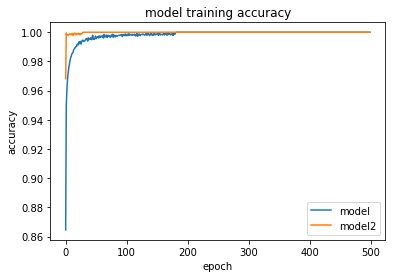

In [22]:
plt.plot(model1.history["acc"])
plt.plot(mode12.history["acc"])

plt.title('model training accuracy')
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.legend(['model' , 'model2'], loc = 'best')

在都訓練到100%的狀態加入不同堆疊者達標較快
